In [70]:
#Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json


In [30]:
state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}


In [31]:
wapo_df=pd.read_csv("ois_clean.csv")
wapo_df.head(10)


,Unnamed: 0,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,Tim Elliot,2015-01-02,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,1,Lewis Lee Lembke,2015-01-02,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2,John Paul Quintero,2015-01-03,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,3,Matthew Hoffman,2015-01-04,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,4,Michael Rodriguez,2015-01-04,other,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,5,Kenneth Joe Brown,2015-01-04,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,6,Kenneth Arnold Buck,2015-01-05,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,7,Brock Nichols,2015-01-06,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,8,Autumn Steele,2015-01-06,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,9,Leslie Sapp III,2015-01-06,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [32]:
wapo_df.describe()


,Unnamed: 0,age
count,3000.000000,3000.000000
mean,1606.739667,36.362000
std,960.086561,12.744087
min,0.000000,6.000000
25%,774.500000,26.000000
50%,1573.500000,34.000000
75%,2426.250000,45.000000
max,3441.000000,91.000000


In [41]:
wapo_df["race"].value_counts()



W    1561
B     771
H     535
N      51
A      50
O      32
Name: race, dtype: int64

In [54]:
race_keys = wapo_df["race"].value_counts().keys()
print(race_keys)
list(race_keys)
race_values = wapo_df["race"].value_counts().values
race_values
type(race_values)

Index(['W', 'B', 'H', 'N', 'A', 'O'], dtype='object')


numpy.ndarray

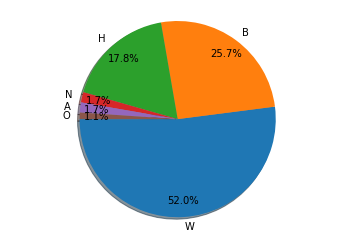

In [63]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#
labels = list(race_keys)
sizes = list(race_values)


fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, pctdistance=.83)
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [56]:
plt.savefig("race.png")

In [64]:
wapo_df["state"].value_counts().head(10)


CA    463
TX    250
FL    189
AZ    143
OH     95
CO     90
GA     90
NC     89
OK     87
MO     78
Name: state, dtype: int64

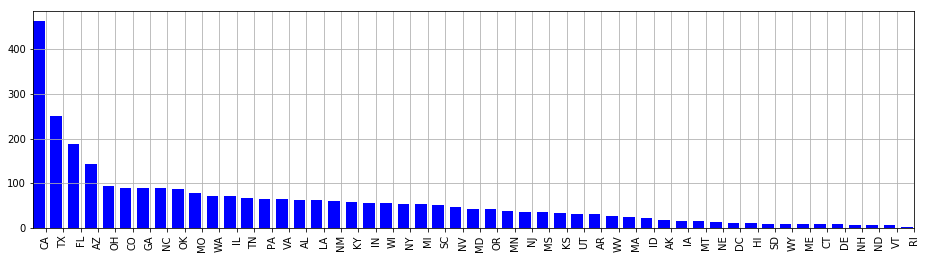

In [84]:
x_labels = list(wapo_df["state"].value_counts().keys())

y = wapo_df["state"].value_counts().values
#N = len(y)
N = 30
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

x = np.arange(len(wapo_df["state"].value_counts().values))
width = 1/1.5
plt.bar(x, y, width, color="blue")
tick_locations = [value+0.4 for value in x]
plt.xticks(tick_locations, x_labels, rotation="vertical")
plt.grid()
plt.show()

In [33]:
wapo_race = wapo_df[["race", "state"]]
wapo_race=wapo_race.reset_index(drop=False)
wapo_race=wapo_race.rename(columns={"state":"incidents"})
wapo_race.head(10)
wapo_race["race"].unique()


array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [28]:
state_race_counts = wapo_race.groupby("state").count()
state_race_counts.head(10)



,race
state,
AK,19
AL,63
AR,31
AZ,143
CA,463
CO,90
CT,10
DC,11
DE,9
